# Prüfungsleitung Maschnielles Lernen: Gruppe 8

bearbeitet von folgenden Matrikelnummern: 2150648, 8503403 <br>
Isolet download: https://datahub.io/machine-learning/isolet

In der vorliegenden Prüfungsleistung wurde die Aufgabe gestellt, Buchstaben anhand von Audioaufnahmen zu erkennen. Als Datenset diente eine bereits vorgefertigte Matrix mit 7797 Samples, welches 617 Merkmalen aus den Audioaufnahmen extrahiert hat. Die 617 Merkmale sind Gleitkommazahlen im Wertebereich von -1 bis 1. Das Notebook beinhaltet beide gestellten Aufgaben, sowie den Code und die dazugehörige Dokumentation in Markdown-Boxen. In der ersten Aufgabe handelt es sich um die Erstellung eines Modells mittels überwachter Lernverfahren. Bei der zweiten Aufgabe mittels einem Deep Learning-Modell. <br>
Die zu verwendeten Bibliotheken sind folgende:
* vorgegebene Bibliotheken: tenserflow, sklearn und numpy
* weitere Bibliotheken: pandas, seaborn und matplotlib

Der Code wurde mit Python v3.10.8 getestet

### Aufgabe 2

Lösung durch unüberwachte Lernverfahren.

#### 1.1) Import und Splitting des Datensatzes

##### Import(s)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import argmax
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
import seaborn as sns

Das zu importierende Datenset soll den Namen "raw_isolet.csv" tragen und im gleichen Pfad, wie das Notebook sein. Zum Zeitpunkt des Herunterladen der Isolet-Datei war die Abgrenzung der Werte durch das Komma-Symbol erfolgt. Sollte sich das geändert haben, muss der Parameter delimeter angepasst werden.

In [ ]:
# import
df_raw_isolet = pd.read_csv("./raw_isolet.csv", delimiter=",")

##### Datenbereinigung

Dadurch dass 'class' ein reserviertes Keyword in Python kollidiert es mit der Funktionsmöglichkeit die Spalte über eigene Funktionsaufrufe aufzurufen. Es wurde diesbezüglich zur Spalte 'Letter' umbenannt. Außerdem wurden die String-typischen Anführungszeichen entfernt. <br>
Zuletzt wird das Datenset in die Merkmale "df_features" und die Buchstaben "df_letters" gesplittet.

In [ ]:
# changing column name 'class' to 'letter' 'cause class is a reserved keyword in python 
df_raw_isolet.rename(columns={'class': 'letter'}, inplace=True)
# removing char ' from letter
df_raw_isolet['letter'] = df_raw_isolet['letter'].replace({'\'': ''}, regex=True)

df_features = df_raw_isolet.iloc[:, :617].to_numpy()
df_letters = df_raw_isolet.iloc[:, 617].to_numpy()

Zur besseren Einteilung wurde ein Wörterbuch erstellt, welches die Zahlen in die gewünschten Buchstaben umwandelt.

In [2]:
dict = {
    1: 'a',
    2: 'b',
    3: 'c',
    4: 'd',
    5: 'e',
    6: 'f',
    7: 'g',
    8: 'h',
    9: 'i',
    10: 'j',
    11: 'k',
    12: 'l',
    13: 'm',
    14: 'n',
    15: 'o',
    16: 'p',
    17: 'q',
    18: 'r',
    19: 's',
    20: 't',
    21: 'u',
    22: 'v',
    23: 'w',
    24: 'x',
    25: 'y',
    26: 'z',
}

##### Data Splitting

Der Datensatz wird nun mit dem gewünschten Verhältnis (test_size) eingeteilt. Damit die Anzahl an Klassen (Buchstaben) gleichmäßig verteilt ist, werden die Datensätze nicht vermischt (shuffle=False). 

In [ ]:
features_train, features_test, letters_train, letters_test = train_test_split(df_features, df_letters, test_size=.25, shuffle=False)

#### 2.2) Netzwerkarchitektur

#### 2.3) Implementierung

In [4]:
# Dimensionen der Trainingsdaten bestimmen
in_shape = df_features.shape[1:]

model = Sequential()
model.add(Dense(1000, activation='relu', kernel_initializer='he_normal', input_shape=in_shape))
model.add(Dense(600, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(400, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(200, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(26, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[SparseCategoricalAccuracy()])
history = model.fit(features_train, letters_train, epochs=30, batch_size=512, verbose=True, validation_data=(features_test, letters_test))
hofModel = model

Epoch 1/30
12/12 [==============================] - 1s 38ms/step - loss: 2.0149 - sparse_categorical_accuracy: 0.4452 - val_loss: 0.6714 - val_sparse_categorical_accuracy: 0.7918
Epoch 2/30
12/12 [==============================] - 0s 27ms/step - loss: 0.4637 - sparse_categorical_accuracy: 0.8437 - val_loss: 0.4051 - val_sparse_categorical_accuracy: 0.8636
Epoch 3/30
12/12 [==============================] - 0s 28ms/step - loss: 0.2945 - sparse_categorical_accuracy: 0.8993 - val_loss: 0.3228 - val_sparse_categorical_accuracy: 0.8928
Epoch 4/30
12/12 [==============================] - 0s 29ms/step - loss: 0.1805 - sparse_categorical_accuracy: 0.9398 - val_loss: 0.2524 - val_sparse_categorical_accuracy: 0.9067
Epoch 5/30
12/12 [==============================] - 0s 29ms/step - loss: 0.1305 - sparse_categorical_accuracy: 0.9560 - val_loss: 0.1968 - val_sparse_categorical_accuracy: 0.9369
Epoch 6/30
12/12 [==============================] - 0s 28ms/step - loss: 0.0933 - sparse_categorical_accu

#### 2.4) Wahl der Loss-Funktion und Optimizer

Accuracy: 0.9564102292060852, Loss: 0.17275142669677734


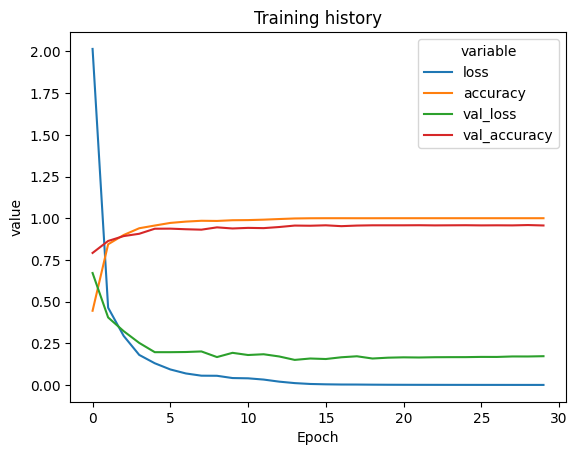

In [5]:
df_history = pd.DataFrame(history.history).reset_index()
df_history.columns = ["Epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
df_history = pd.melt(df_history, id_vars="Epoch", value_vars=["loss", "accuracy", "val_loss", "val_accuracy"])
fig = sns.lineplot(df_history, x="Epoch", y="value", hue="variable")
fig.set_title("Training history")
loss, acc = model.evaluate(features_test, letters_test, verbose=0)
print(f"Accuracy: {acc}, Loss: {loss}")

#### 2.5) Evaluierung

##### 3-fold cv

In [10]:
# Dimensionen der Trainingsdaten bestimmen
in_shape = df_features.shape[1:]

kfold = KFold(n_splits=3)
acc_per_fold = []
loss_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(features_train, letters_train):

    model = Sequential()
    model.add(Dense(617, activation='relu', kernel_initializer='he_normal', input_shape=in_shape))
    model.add(Dense(400, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(200, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(26, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[SparseCategoricalAccuracy()])

    # Generate a print 
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    model.fit(features_train[train], letters_train[train], epochs=30, batch_size=512, verbose=False)
    
    # Generate generalization metrics
    loss, acc = model.evaluate(features_train[test], letters_train[test], verbose=False)
    print(f'Score for fold {fold_no}: loss of {loss}; accuracy of {acc*100}%')
    acc_per_fold.append(acc * 100)
    loss_per_fold.append(loss)

    # Increase fold number
    fold_no = fold_no + 1
    
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.24106845259666443; accuracy of 93.89430284500122%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.1896737515926361; accuracy of 93.94561052322388%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.1698891669511795; accuracy of 94.86916661262512%
------------------------------------------------------------------------


In [13]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.24106845259666443 - Accuracy: 93.89430284500122%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.1896737515926361 - Accuracy: 93.94561052322388%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.1698891669511795 - Accuracy: 94.86916661262512%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 94.23635999361674 (+- 0.447951844329101)
> Loss: 0.2002104570468267
------------------------------------------------------------------------


In [12]:
# Letter 1 -> a
# X_pred = [-0.4394,-0.093,0.1718,0.462,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.231,-0.2958,-0.2704,-0.262,-0.217,-0.0874,-0.0564,0.0254,0.0958,0.4226,0.6648,0.9184,0.9718,0.9324,0.707,0.6986,0.755,0.8816,1,0.938,0.845,0.7268,0.5578,-0.433,-0.1982,0.127,0.3666,0.4496,0.4258,0.2646,-0.0368,-0.07,-0.229,-0.2622,-0.3428,-0.191,-0.2242,-0.153,0.0344,0.108,0.146,0.338,0.6726,0.822,1,0.7912,0.656,0.6466,0.6916,0.6252,0.694,0.6986,0.5848,0.478,0.3334,-0.3872,-0.129,0.1656,0.4394,0.5228,0.3534,0.163,-0.0692,-0.1186,-0.1734,-0.2074,-0.4028,-0.283,-0.3846,-0.2698,-0.1656,0.017,0.0612,0.1604,0.5958,0.7654,1,0.807,0.7574,0.7314,0.7184,0.6376,0.6532,0.4472,0.335,0.309,0.0144,-0.3698,-0.0616,0.2408,0.5882,0.6806,0.196,0.0252,0.0644,-0.2212,-0.283,-0.2942,-0.5994,-0.3838,-0.4566,-0.6834,-0.4034,-0.2352,-0.1456,-0.0896,0.395,0.5798,0.8768,1,0.9888,0.8712,0.9608,0.9104,1,0.703,0.6134,0.535,0.367,-0.2942,0.0028,0.308,0.5178,0.6458,0.109,-0.188,-0.1444,-0.4414,-0.4468,-0.3896,-0.5286,-0.5832,-0.6268,-0.5504,-0.4904,-0.4578,-0.406,-0.2344,0.079,0.3324,0.703,0.9456,1,0.981,0.9836,0.9892,0.91,0.6758,0.5994,0.515,0.466,0.007,0.584,0.3812,0.458,0.07,-0.1084,-0.5944,-0.514,-0.6468,-0.8252,-0.8006,-0.6538,-0.6994,-0.7518,-0.4336,-0.5174,-0.4896,-0.493,-0.4896,-0.0034,0.3146,0.8216,0.8426,0.8812,0.8916,1,0.8356,0.556,0.3042,0.1258,0.0734,-0.0874,-0.4728,0.6218,0.2952,-0.3696,-0.5014,-0.4958,-0.4842,-0.381,-0.639,-0.4498,-0.3008,-0.2952,-0.3352,-0.5014,-0.2608,-0.169,-0.232,-0.0372,0.232,0.49,0.6446,0.4958,0.404,0.7078,1,0.914,0.5816,-0.318,-0.4098,-0.381,-0.3008,-0.1862,-0.4222,-0.1112,0.1556,0.3778,0.5556,0.5556,0.2888,0.0222,-0.0222,-0.2444,-0.2,-0.2444,-0.1556,-0.1556,-0.1556,-0.0222,0.0666,0.1556,0.4666,0.7334,0.8666,0.9556,0.8666,0.7334,0.8222,0.9112,0.9112,1,1,0.9112,0.8222,0.7334,-0.5428,-0.1428,0.0858,0.3142,0.4858,0.6,0.1428,-0.1428,-0.3714,-0.4286,-0.8286,-0.6,-0.4858,-0.4286,-0.3714,-0.3714,-0.4286,-0.4858,-0.2,0.1428,0.4858,0.4858,0.7142,0.6,0.6572,0.8286,0.8286,0.9428,0.9428,1,0.8858,0.7142,-0.2658,0.0632,0.2912,0.2912,0.1392,-0.038,-0.4936,-0.3924,-0.6962,-0.8482,-0.7974,-0.6962,-0.6202,-0.6456,-0.5444,-0.6456,-0.2912,-0.3924,-0.3164,0.038,0.1392,0.6202,0.8988,1,0.8228,0.8228,0.5444,0.1898,0.3418,0.1646,0.114,0.114,-1,-1,-1,-1,-1,-1,-0.895,-0.865,-0.91,-0.85,-0.385,0.91,0.95,0.905,0.85,0.865,0.89,0.8,0.51,0.26,-0.09,-0.635,-0.89,-0.905,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-0.8842,-0.8092,-0.811,-0.1482,-0.4174,0.6814,0.7224,0.8842,0.6286,0.5094,0.4958,0.3152,0.1226,-0.334,-0.5758,-0.804,-0.9028,-0.925,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-0.76,-0.15,0.01,0.26,0.1432,-0.525,-0.4218,-0.4718,-0.4384,-0.5518,-0.6484,-0.6186,-0.5216,-0.5294,-0.7448,-0.6278,-0.8534,-0.9268,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-0.3428,-0.4,-0.5714,-0.3714,1,1,-1,-1,-0.9142,-0.9714,-0.9714,-0.9714,-0.5428,-0.5142,-0.8286,-0.1714,-0.6572,-0.5428,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,0.9696,0.5646,1,1,1,1,0.9998,0.9946,0.9772,0.9804,1,0.9264,-0.4934,0.4942,-0.4122,0.627,0.6422,0.603,0.6934,-0.75,-0.4824,-0.5464,-0.3738,-0.3482,-0.1948,-0.1694,-0.1694,-0.099,-0.3418,-0.1374,0.1502,0.0798,0.1758,0.3802,0.706,0.7252,0.5272,0.508,0.3802,0.0926,0.2908,0.361,-0.0734,0.016,-0.214,0.1054,0.1694,0.5016,0.7444,0.8274,1,0.7252,-0.5644,-0.5958,-0.3596,-0.1234,-0.2494,-0.2914,-0.1706,-0.1864,-0.328,0.0604,0.4016,0.4278,0.1864,0.5328,0.6326,0.6482,0.3754,0.3544,0.5854,0.1864,0.8162,0.6536,-0.1286,-0.0132,0.0446,0.2808,0.4804,0.7008,0.7952,0.9212,1,0.5224,-0.6836,-0.5,-0.1174,-0.1938,-0.4082,-0.352,-0.3826,-0.403,-0.1326,0.4234,0.9898,0.9898,0.7806,0.7858,1,0.8674,0.6836,0.5408,0.4796,0.1224,0.8164,0.5816,-0.3572,-0.0408,0.2448,0.1582,0.3316,0.6888,0.8572,0.8622,0.898,0.546,-0.891,-1,1,-1,-1,-1,-1,0.1334,-1,-0.077,0.0512,0.2564,0.5642,0.4872,0.077,0.4358,0.7436,0.5128,0.6666,0.641,0.6154,1,0.8206,0.641,0.359,0.6924,0.4358,0.1538,0.4616,0.6154,0.3334,0.3334,0.4102,0.2052,0.3846,0.359,0.5898,0.3334,0.641,0.5898,-0.4872]

# Letter 2 -> b
# X_pred = [-0.233,0.2124,0.5014,0.5222,-0.3422,-0.584,-0.7168,-0.6342,-0.8614,-0.8318,-0.7228,-0.6312,-0.4986,-0.708,-0.6666,-0.5428,-0.413,-0.3776,-0.0472,0.1356,0.6136,0.8024,1,0.9794,0.9352,0.8732,0.944,0.9588,0.6962,0.4838,0.3982,0.2064,-0.327,0.0134,0.362,0.3218,-0.4558,-0.8096,-0.7748,-0.7238,-0.8392,-0.9544,-0.9088,-0.6462,-0.6434,-0.614,-0.7024,-0.6702,-0.6194,-0.4344,-0.4076,-0.2574,0.1636,0.3994,0.7024,0.9008,0.8686,0.7614,0.9088,1,0.992,0.8632,0.6756,0.4102,-0.4166,-0.1528,0.2346,0.1832,-0.4282,-0.776,-0.846,-0.8134,-0.8554,-0.8204,-0.7526,-0.7036,-0.6382,-0.6126,-0.6196,-0.545,-0.5122,-0.6196,-0.3908,-0.3372,-0.1178,0.3676,0.678,0.8716,0.7852,0.7526,0.8134,1,0.9604,0.8226,0.573,0.5192,-0.4292,-0.1532,0.1996,0.1484,-0.406,-0.6984,-0.7958,-0.7216,-0.9328,-0.8492,-0.7958,-0.7424,-0.7308,-0.652,-0.6194,-0.6148,-0.5498,-0.5452,-0.4292,-0.3526,-0.065,0.3202,0.5962,0.9096,0.8004,0.8028,0.8886,0.9792,1,0.7726,0.6102,0.4942,-0.317,-0.0208,0.2754,0.2362,-0.4786,-0.7528,-0.7258,-0.6646,-0.7724,-0.694,-0.6744,-0.6402,-0.6598,-0.6696,-0.5986,-0.6818,-0.5618,-0.5276,-0.4688,-0.344,0.055,0.295,0.5152,1,0.9854,0.7308,0.885,0.88,0.9388,0.7478,0.7258,0.4444,-0.2506,0.1634,0.3542,0.376,-0.4496,-0.6076,-0.6702,-0.654,-0.8446,-0.7194,-0.684,-0.7574,-0.7684,-0.8366,-0.6594,-0.6104,-0.692,-0.6702,-0.6404,-0.436,-0.237,0.1716,0.5668,0.7792,0.9238,0.842,0.7548,1,0.9674,0.8474,0.673,0.5886,-0.1506,0.5914,0.4802,0.6954,-0.0358,-0.5304,-0.5484,-0.4552,-0.8028,-0.7348,-0.6666,-0.6882,-0.742,-0.975,-0.6846,-0.7348,-0.656,-0.613,-0.7562,-0.38,0.025,0.3118,0.7706,0.8888,0.9964,0.9176,0.914,1,0.9462,0.681,0.466,0.4266,-0.1282,0.2308,0.4872,0.3846,-0.2308,-0.4358,-0.3846,-0.3846,-0.6924,-0.4872,-0.5384,-0.4872,-0.1282,-0.1794,-0.3846,0.077,0.0256,-0.077,0.1794,0.6924,1,0.6924,0.641,0.9488,0.6924,0.3846,0.2308,0.0256,0.1794,-0.3334,0.077,0.0256,-0.3,0.05,0.3,0.35,-0.3,-0.35,-0.55,-0.5,-0.55,-0.75,-0.7,-0.65,-0.7,-0.65,-0.65,-0.6,-0.7,-0.35,0.05,0.15,0.8,0.75,0.9,0.8,0.8,1,0.75,0.55,0.5,0.3,0.35,0.1,-0.1764,0.0392,0.3726,0.3334,-0.196,-0.549,-0.5882,-0.4902,-0.3726,-0.3726,-0.3922,-0.5294,-0.2156,-0.255,-0.451,-0.2156,-0.196,-0.4118,-0.0196,0,0.098,0.4902,0.7844,0.9216,0.8628,0.8628,0.9216,1,0.9608,0.9412,0.6666,0.5882,-1,-1,-1,-1,-1,-1,-1,-1,-0.8008,-0.8174,-0.2738,0.8796,0.8216,0.5602,0.5478,0.4688,0.4356,0.3568,0.3652,0.3568,0.1868,-0.058,-0.5104,-0.8424,-0.9046,-0.9088,-0.9378,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-0.861,-0.869,-0.1062,0.5988,0.3902,0.4816,0.6484,0.8034,0.8988,0.718,0.3128,0.13,-0.0408,-0.3128,-0.6782,-0.8034,-0.8352,-0.8074,-0.9066,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-0.9334,-0.8734,-0.6068,-0.4084,-0.4634,-0.2662,-0.2308,-0.1632,-0.1308,-0.214,-0.2878,-0.457,-0.6294,-0.8154,-0.8534,-0.44,-0.3068,-0.4468,-0.9234,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-0.9428,1,1,1,-0.9142,-0.9714,-0.9714,-0.9142,-1,-0.9142,-0.9714,-0.9714,-0.8572,0.4,-0.0572,-0.6,-0.7428,-0.4858,-0.4286,-1,-1,-1,-1,-1,-1,-0.3504,-0.3592,-0.3746,-0.3802,-0.3676,-0.4006,-0.3938,-0.4374,-0.4316,-0.3986,1,1,1,1,1,1,1,1,1,1,-0.52,0.5412,0.1202,0.1698,0.6306,0.7458,0.6802,0.5666,0.2654,0.3878,0.4286,0.2654,0.347,0.4286,0.8368,0.8776,0.9184,1,0.9184,0.9184,0.9184,0.8368,0.8368,0.9184,0.9184,0.7552,0.7142,0.7142,0.8776,0.7552,0.8368,0.6734,0.796,0.6326,0.7552,0.7552,0.6734,0.7142,0.4286,0.0612,0.0476,0.0952,-0.119,-0.1666,-0.1428,-0.0952,0.262,0.4048,0.5476,1,0.7858,0.5,0.6428,0.5,0.381,0.7142,1,0.5952,0.1666,0.1904,0.5952,0.4524,0.4762,0.3096,0.4286,0.0714,-0.0476,0.1904,0.1904,0.4048,0.0714,-0.0238,0.2858,0.551,0.4082,-0.0816,-0.4082,-0.0612,-0.0408,0.0408,0.4694,0.8164,0.9592,1,0.9796,0.5918,0.4082,0.3674,0.8572,0.7552,0.1224,0.204,0.3878,0.2448,0.2448,0.1836,0.2858,0.204,0.1632,0.102,0.1632,0.102,-0.1224,-0.1224,0.9424,-1,-1,1,-0.8,-1,-0.6,-0.8334,-1,-0.4286,-0.254,-0.365,-0.0952,-0.0794,0.0318,-0.2064,0.0634,0.1112,0.1746,0.238,0.1904,0.508,0.5396,0.0318,-0.0158,0.7142,1,0.4126,-0.0794,-0.0476,0,0.0952,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.254,0.1588,-0.4762]

# Letter 24 -> x
X_pred = [-0.632,-0.136,-0.152,-0.104,0.176,0.368,0.368,0.312,-0.048,-0.104,-0.176,-0.096,-0.088,-0.168,0.016,0.24,0.456,0.616,0.928,0.872,0.648,0.6,0.608,0.608,0.76,0.848,1,0.92,0.672,0.544,0.648,0.608,-0.542,-0.3226,0.0194,0.058,0.2968,0.5032,0.6968,0.6194,0.0064,0.142,0.187,0.1032,-0.0452,0.3226,0.4258,0.3936,0.7548,0.8646,0.987,0.6646,0.6452,0.7484,0.7548,0.6258,0.9678,1,0.942,0.7612,0.8452,0.8322,0.5742,0.7354,-0.4214,-0.1142,0.25,0.2072,0.3,0.7858,0.7072,0.7928,0.15,0.3,0.3928,-0.0358,0.3,0.4,0.2714,0.6,0.8358,1,0.7858,0.5858,0.6786,0.7214,0.5572,0.6072,0.9428,0.9214,0.8142,0.85,0.7858,0.5286,0.5428,0.4928,-0.376,-0.0076,0.3534,0.3458,0.4136,0.782,0.782,0.7518,0.4586,0.376,0.2406,0.1804,0.2632,0.2106,0.5112,0.6316,1,0.8796,0.7444,0.2106,0.2482,0.436,0.406,0.3984,0.3834,0.767,0.7594,0.421,0.3008,0.1128,0.1428,0.0376,-0.364,0.0036,0.3004,0.3286,0.4276,0.7244,0.7314,0.7738,0.6114,0.371,0.1872,0.1024,0.2084,0.0248,0.5266,0.7032,1,0.9506,0.5478,0.6326,0.7102,0.5902,0.3992,0.6254,0.9506,0.8446,0.781,0.258,0.2226,0.1308,-0.0036,0.1802,-0.5374,-0.0896,0.1568,0.2238,0.5,0.6044,0.7238,0.5074,0.4626,0.209,0.1418,0.194,0.194,0.194,0.3284,0.694,0.6344,0.8956,0.6568,0.709,0.5448,0.3582,0.6568,1,1,0.8284,0.6716,0.694,0.4552,0.388,0.3358,0.5,-0.7248,-0.2294,0.0918,0.1376,0.4678,0.2752,0.2478,0.0092,-0.11,-0.2294,-0.2294,-0.1834,-0.3944,-0.156,0.0458,0.101,0.3028,0.7156,0.6056,0.7248,0.7982,0.789,1,0.9816,0.945,0.5412,0.3944,0.1376,-0.0276,0.1926,0.3394,0.211,-0.5882,-0.2942,-0.4118,-0.1764,-0.1764,0,0,0.1764,0,-0.0588,-0.0588,-0.1764,0,0.0588,0.0588,0.2352,0.5882,0.7648,0.8824,0.8236,0.7058,0.5882,0.647,0.7058,0.8236,0.9412,1,0.9412,0.8236,0.7648,0.7058,0.7058,-0.6,-0.25,-0.15,-0.3,0.1,0.55,0.6,0.1,0.1,-0.2,-0.25,-0.25,-0.15,-0.25,-0.1,0.15,0.55,0.75,0.85,0.85,0.65,0.7,0.6,0.6,1,1,1,0.95,0.65,0.6,0.65,0.6,-0.5,-0.0834,0.2222,0.2222,0.2778,0.7778,0.6388,0.75,0.1944,0.1944,0.3056,-0.0556,0.25,0.4166,0.0556,0.6944,0.8888,0.8888,0.6388,0.6388,0.4444,0.8056,0.5834,0.5834,1,0.9444,0.9444,0.9722,0.8056,0.6112,0.5278,0.4722,-1,-1,-1,-1,-1,-1,-0.8976,-0.9284,-0.8926,-0.8722,-0.3452,0.2226,0.5652,0.8516,0.9846,0.9336,0.8006,0.7852,0.6624,0.5806,0.289,-0.289,-0.7954,-0.8824,-0.9028,-0.8976,-0.9028,-0.8824,-0.9028,-0.8772,-0.7392,-0.9028,-0.8722,-1,-1,-1,-1,-1,-1,-0.9552,-0.9552,-0.9492,-0.9392,-0.5788,-0.099,0.4764,0.99,0.6734,0.2404,0.0334,-0.095,-0.0124,-0.0304,0.093,-0.6246,-0.9204,-0.9184,-0.9562,-0.9552,-0.9542,-0.9304,-0.9104,-0.9502,-0.6804,-0.8258,-0.5798,-1,-1,-1,-1,-1,-1,-0.94,-0.9668,-0.7934,-0.69,-0.5568,-0.43,-0.31,-0.185,-0.2,-0.32,-0.585,-0.528,-0.576,-0.488,-0.32,-0.588,-0.8768,-0.8734,-0.8734,-0.9,-0.94,-0.8,-0.72,-0.9534,-0.2368,0.2566,0.98,-1,-1,-1,-1,-1,-1,-0.6858,-0.8858,-0.7142,-0.3428,1,1,1,0.1428,-0.5142,-0.0286,-0.1428,-0.8286,-0.7428,-0.5142,1,1,1,-0.9142,-0.7714,-0.9428,-0.8572,0.1428,-0.0858,1,1,0.9142,1,1,1,1,1,1,1,1,1,1,1,0.6594,0.6534,0.5808,0.5742,0.5778,0.5212,0.508,0.4586,0.3458,0.3322,-0.6,-0.5412,-0.3948,-0.3868,0.118,0.5958,1,0.0334,0.4666,0.8,0.6,0.9334,0.4,0.6,0.3334,0.5334,0.7334,0.8,1,1,0.8666,0.7334,1,0.5334,0.3334,0.4666,0.7334,0.2666,0.1334,0.3334,-0.2666,-0.5334,0.0666,0.2666,0.3334,0.2666,0.8,0.8666,0.8666,0.4,-0.2422,0.1368,0.621,0.6842,0.4526,0.2422,0.1578,0.2422,0.8106,1,0.8106,0.7052,0.8948,0.8736,0.8316,0.7474,0.6842,0.5578,0.2422,-0.0106,0.2422,0.2,-0.3052,-0.4526,-0.2632,-0.0106,-0.0948,-0.221,-0.179,0.0526,0.4526,-0.0736,0.1212,0.2424,0.4848,0.3636,-0.0606,0.2122,0.1516,-0.1212,0.4242,0.8484,0.6666,0.4242,0.8182,1,0.4546,0.5758,0.7878,0.8484,0.8484,0.3334,0.4848,0.2122,-0.0606,-0.1516,0.303,-0.0304,-0.0606,0.0304,0.303,0.4848,0.5454,0.303,0.0234,-1,-1,1,-1,-1,-1,-0.8334,1,-0.8658,-0.8256,-0.557,-0.557,-0.3422,0.1276,0.2752,0.0738,0.0738,0.1276,-0.047,-0.1006,0.0872,0.0336,0.0202,-0.0202,-0.1006,0.0604,0.4094,0.1678,0.3288,0.5704,0.7986,1,0.8926,0.2484,0.4766,0.4766,0.5034,0.4496,0.3692,0.2484]


y_pred = hofModel.predict([X_pred])

print('--------------------------------------------------------------------------------------------')
print(f'Predicted:')
print(f'Letter: {dict[argmax(y_pred) + 1]} => Letter Number: {argmax(y_pred) + 1}')
print('--------------------------------------------------------------------------------------------')
print(f'Predicted: {y_pred}')
print('--------------------------------------------------------------------------------------------')

1/1 [==============================] - 0s 88ms/step
--------------------------------------------------------------------------------------------
Predicted:
Letter: x => Letter Number: 24
--------------------------------------------------------------------------------------------
Predicted: [[8.1507278e-06 1.1539062e-08 3.3336502e-12 9.7301074e-09 1.6280184e-10
  1.6051288e-05 1.2966779e-10 2.1354623e-04 1.4599298e-06 1.6043910e-09
  8.6740378e-08 6.9645720e-09 1.6046243e-08 1.5256309e-06 2.8461219e-10
  1.6872697e-07 2.0835573e-11 1.6465879e-09 5.3316104e-08 2.9099834e-10
  2.9640783e-11 5.5716618e-13 5.7674931e-09 9.9975878e-01 7.1965999e-08
  8.9845952e-12]]
--------------------------------------------------------------------------------------------


# Weitere Bestandteiles des Kurzreports

### Arbeitsverteilung

### Diskussion beider Implementierungsvorgänge